<a href="https://colab.research.google.com/github/aarti-singh22/global-terrorism-analysis/blob/main/Global_Terrorism_by_Aarti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**IMPORT LIBRARIES**

To get started we need to import some libraries.

In [1]:
#Import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

**THE DATA**

Reading GLobal Terrorism Data.csv into Pandas dataframe.

In [2]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specifying file path 
filepath = '/content/drive/MyDrive/Global Terrorism Analysis – Aarti Hada/Copy of Global Terrorism Data.csv'
# To detect the character encoding of file.
import chardet
with open(filepath, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [4]:
# loading csv File
terrorism = pd.read_csv(filepath, encoding = 'ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# To show all columns of Pandas dataframe.
pd.set_option('display.max_columns', None)
# Print head of dataframe.
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
# Descriptive statistical details for the dataset
terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [7]:
# Estimating the size of data
terrorism.shape

(181691, 135)

The dataset has 181691 rows and 135 columns.

# **EXPLORATORY DATA ANALYSIS**

We start with checking out the missing data.

**MISSING DATA**

Firstly, we will find out the null values and percentage of null values in each column.

In [8]:
# To show all the rows of Pandas dataframe.
pd.set_option('display.max_rows', None)
# Checking missing values
total = terrorism.isnull().sum().sort_values(ascending = False)
# Percentage of Null values
percentage = ((terrorism.isnull().sum()/terrorism.isnull().count()) * 100 ).sort_values(ascending = False)
missing_values = pd.concat([total,percentage], axis = 1, keys = ['Total', 'Percentage'])
missing_values

,Total,Percentage
gsubname3,181671,99.988992
weapsubtype4_txt,181621,99.961473
weapsubtype4,181621,99.961473
weaptype4,181618,99.959822
weaptype4_txt,181618,99.959822
claimmode3,181558,99.926799
claimmode3_txt,181558,99.926799
gsubname2,181531,99.911938
claim3,181373,99.824978
guncertain3,181371,99.823877


**Next, we will remove the columns with null values greater then 75% or the columns which does not contribute much to the analysis and keep only the columns which proffer to analysis.**

In [9]:
# Keeping only necessary columns in the dataset
new_columns = ['success','attacktype1_txt', 'weaptype1_txt', 'region_txt', 'country_txt', 'gname', 'targtype1_txt', 'imonth', 'iday','iyear','provstate','target1','nkill','nwound','summary','motive' ]
terrorism = terrorism[new_columns]

In [10]:
# Printing head of the modified dataset
terrorism.head()

,success,attacktype1_txt,weaptype1_txt,region_txt,country_txt,gname,targtype1_txt,imonth,iday,iyear,provstate,target1,nkill,nwound,summary,motive
0,1,Assassination,Unknown,Central America & Caribbean,Dominican Republic,MANO-D,Private Citizens & Property,7,2,1970,NaN,Julio Guzman,1.0,0.0,NaN,NaN
1,1,Hostage Taking (Kidnapping),Unknown,North America,Mexico,23rd of September Communist League,Government (Diplomatic),0,0,1970,Federal,"Nadine Chaval, daughter",0.0,0.0,NaN,NaN
2,1,Assassination,Unknown,Southeast Asia,Philippines,Unknown,Journalists & Media,1,0,1970,Tarlac,Employee,1.0,0.0,NaN,NaN
3,1,Bombing/Explosion,Explosives,Western Europe,Greece,Unknown,Government (Diplomatic),1,0,1970,Attica,U.S. Embassy,NaN,NaN,NaN,NaN
4,1,Facility/Infrastructure Attack,Incendiary,East Asia,Japan,Unknown,Government (Diplomatic),1,0,1970,Fukouka,U.S. Consulate,NaN,NaN,NaN,NaN


In [11]:
# Checking the shape to verify number of columns
terrorism.shape

(181691, 16)

The number of columns is reduced to 16.

**DATA DESCRIPTION**

To understand the data in the column and the meaning of the column name we will see the unique values of each column.


In [12]:
# Returns all unique elements of the column success.
terrorism['success'].unique()

array([1, 0])

In [13]:
# Returns all unique elements of the column attacktype1_txt.
terrorism['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [14]:
# Returns all unique elements of the column weaptype1_txt.
terrorism['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [15]:
# Returns all unique elements of the column region_txt.
terrorism['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [16]:
# Returns all unique elements of the column country_txt.
terrorism['country_txt'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [17]:
# Returns all unique elements of the column gname.
terrorism['gname'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [18]:
# Returns all unique elements of the column targtype1_txt.
terrorism['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [19]:
# Returns all unique elements of the column imonth.
terrorism['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [20]:
# Returns all unique elements of the column iday.
terrorism['iday'].unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29])

In [21]:
# Returns all unique elements of the column iyear.
terrorism['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [22]:
# Returns all unique elements of the column provstate.
terrorism['provstate'].unique()

array([nan, 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [23]:
# Returns all unique elements of the column target1.
terrorism['target1'].unique()

array(['Julio Guzman', 'Nadine Chaval, daughter', 'Employee', ...,
       'Personal Security Officer of Council Member Ihuing Pame: Prafulla Phukan',
       'Jewelry Shop', 'Hmeymim Air Base'], dtype=object)

In [24]:
# Returns all unique elements of the column nkill.
terrorism['nkill'].unique()

array([1.000e+00, 0.000e+00,       nan, 7.000e+00, 4.700e+01, 2.000e+00,
       3.600e+01, 5.000e+00, 3.000e+00, 4.000e+00, 2.500e+01, 1.500e+01,
       2.600e+01, 8.000e+00, 8.100e+01, 6.000e+00, 9.000e+00, 1.600e+01,
       3.000e+01, 3.100e+01, 1.200e+01, 2.100e+01, 1.400e+01, 8.800e+01,
       1.100e+01, 1.000e+01, 2.700e+01, 1.800e+01, 2.200e+01, 1.900e+01,
       9.200e+01, 1.300e+01, 7.300e+01, 1.000e+02, 4.200e+01, 4.300e+01,
       1.700e+01, 9.800e+01, 4.220e+02, 4.800e+01, 3.400e+01, 5.400e+01,
       5.000e+01, 3.500e+01, 2.000e+01, 4.100e+01, 3.700e+01, 2.800e+01,
       4.000e+01, 3.200e+01, 8.500e+01, 2.300e+01, 3.000e+02, 6.000e+01,
       2.400e+01, 5.800e+01, 7.000e+01, 8.700e+01, 4.500e+01, 3.800e+01,
       2.900e+01, 7.400e+01, 8.300e+01, 9.000e+01, 6.600e+01, 8.000e+01,
       6.700e+01, 5.100e+01, 3.900e+01, 1.140e+02, 1.240e+02, 7.600e+01,
       3.300e+01, 7.500e+01, 5.700e+01, 6.200e+01, 4.600e+01, 5.600e+01,
       6.300e+01, 1.200e+02, 1.020e+02, 7.800e+01, 

In [25]:
# Returns all unique elements of the column nwound.
terrorism['nwound'].unique()

array([0.000e+00,       nan, 1.000e+00, 2.000e+00, 7.000e+00, 9.000e+00,
       1.700e+01, 5.000e+00, 3.000e+00, 1.000e+01, 1.200e+01, 2.000e+01,
       4.000e+00, 1.100e+01, 2.700e+01, 1.300e+01, 1.900e+01, 1.300e+02,
       5.600e+01, 2.400e+01, 6.000e+00, 7.200e+01, 2.380e+02, 5.500e+01,
       1.500e+01, 8.000e+00, 1.800e+01, 5.000e+01, 3.400e+01, 1.400e+01,
       7.000e+01, 1.020e+02, 4.100e+01, 4.800e+01, 3.600e+01, 2.500e+01,
       8.100e+01, 5.400e+01, 5.300e+01, 1.000e+02, 4.500e+01, 3.300e+01,
       4.000e+01, 6.200e+01, 7.400e+01, 2.200e+01, 3.100e+01, 1.600e+01,
       3.000e+01, 2.850e+02, 2.300e+01, 4.200e+01, 4.300e+01, 7.600e+01,
       4.400e+01, 5.200e+01, 4.600e+01, 4.900e+01, 1.600e+02, 3.700e+01,
       2.100e+01, 6.000e+01, 7.800e+01, 2.600e+01, 2.800e+01, 3.900e+01,
       3.800e+01, 3.500e+01, 3.200e+01, 8.000e+01, 4.700e+01, 1.880e+02,
       2.150e+02, 8.500e+01, 7.500e+01, 1.610e+02, 9.000e+01, 3.000e+02,
       9.500e+01, 1.350e+02, 6.100e+01, 1.380e+02, 

In [26]:
# Returns all unique elements of the column summary.
terrorism['summary'].unique()

array([nan,
       '1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.',
       '1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.',
       ...,
       '12/31/2017: Assailants set fire to houses in Kubentog, Datu Hoffer, Maguindanao, Philippines. There were no reported casualties in the attack. No group claimed responsibility for the incident; however, sources attributed the attack to the Bangsamoro Islamic Freedom Movement (BIFM).',
       '12/31/2017: Assailants threw a grenade at a Forest Department of

In [27]:
# Returns all unique elements of the column motive.
terrorism['motive'].unique()

array([nan, 'To protest the Cairo Illinois Police Deparment',
       'To protest the War in Vietnam and the draft', ...,
       'The specific motive is unknown; however, sources stated that the attack was carried out in retaliation for the death of Noor Mohammad Tantray (Noor Trali), a Jaish-e-Mohammad (JeM) leader, by security personnel on December 26, 2017 in Pulwama.',
       'The specific motive is unknown; however, sources noted that the targeted building housed migrants.',
       'The specific motive is unknown; however, sources stated that the Taliban had warned one of the victims against collaborating with the government.'],
      dtype=object)

**COLUMN NAMES EXPLAINED**

1. success : The record of attack's success or failure..
2. attacktype1_txt :  The type of terrorist attack, whether it was Bombing, Explosion, Assassination etc.
3. weaptype1_txt : The type of weapons used by terrorist to attack.
4. region_txt : The region where attack happened.
5. country_txt : The country in that particular region where the attack took place.
6. gname : This refers to the terrorist group.
7. targtype1_txt : This refers to the group or media on which the attack was targeted.
8. imonth : month of attack.
9. iday : Date of attack.
10. iyear : year of attack.
11. provstate : Refers to the state.
12. target1 : Main target of attack.
13. nkill : Number of people killed.
14. nwound : Number of people wounded.
15. summary : Summary of the attack.
16. motive : Motive of the attack

In [28]:
#Changing column names to make more sense.
terrorism.rename(columns = {'success':'Attack_Success','attacktype1_txt':'Attack_Type','weaptype1_txt':'Weapon_Used','region_txt':'Region','country_txt':'Country','gname':'Terrorist_group','targtype1_txt':'Targeted_group','imonth':'Month','iday':'Day','iyear':'Year','provstate':'State','target1':'Main_Target','nkill':'Killed','nwound':'Wounded','summary':'Attack_Summary','motive':'Attack_Motive'}, inplace = True)

In [29]:
# Returns the column labels of the DataFrame
terrorism.columns

Index(['Attack_Success', 'Attack_Type', 'Weapon_Used', 'Region', 'Country',
       'Terrorist_group', 'Targeted_group', 'Month', 'Day', 'Year', 'State',
       'Main_Target', 'Killed', 'Wounded', 'Attack_Summary', 'Attack_Motive'],
      dtype='object')

**REMOVING DUPLICATE ROWS**

In [30]:
#Shows number of duplicate rows
terrorism[terrorism.duplicated()].shape

(10039, 16)

In [31]:
# Size of dataset
terrorism.shape

(181691, 16)

In [32]:
#Remove Duplicates
terrorism.drop_duplicates(inplace= True)

In [33]:
# Size of new dataset
terrorism.shape

(171652, 16)

**REMAINING MISSING DATAS**


In [34]:
# Null values and its counts
terrorism.isnull().sum()

Attack_Success          0
Attack_Type             0
Weapon_Used             0
Region                  0
Country                 0
Terrorist_group         0
Targeted_group          0
Month                   0
Day                     0
Year                    0
State                 421
Main_Target           540
Killed               9263
Wounded             15091
Attack_Summary      58671
Attack_Motive      121790
dtype: int64

In [35]:
# Concise summary of dataset
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171652 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Attack_Success   171652 non-null  int64  
 1   Attack_Type      171652 non-null  object 
 2   Weapon_Used      171652 non-null  object 
 3   Region           171652 non-null  object 
 4   Country          171652 non-null  object 
 5   Terrorist_group  171652 non-null  object 
 6   Targeted_group   171652 non-null  object 
 7   Month            171652 non-null  int64  
 8   Day              171652 non-null  int64  
 9   Year             171652 non-null  int64  
 10  State            171231 non-null  object 
 11  Main_Target      171112 non-null  object 
 12  Killed           162389 non-null  float64
 13  Wounded          156561 non-null  float64
 14  Attack_Summary   112981 non-null  object 
 15  Attack_Motive    49862 non-null   object 
dtypes: float64(2), int64(4), object(10)
me

Fill the Null values.

In [36]:
# Fill the missing values for Killed and Wounded with 0 and converting their datatypes from float to int.
terrorism['Killed'] = terrorism['Killed'].fillna(0).astype(int)
terrorism['Wounded'] = terrorism['Wounded'].fillna(0).astype(int)
# Fill the missing values for Attack Summary, Attack Motive and Main Target with Not Known
terrorism['Attack_Summary'].fillna('Not Known', inplace = True)
terrorism['Attack_Motive'].fillna('Not Known', inplace = True)
terrorism['Main_Target'].fillna('Not Known', inplace = True)

In [37]:
# Checking Null values again
terrorism.isnull().sum()

Attack_Success       0
Attack_Type          0
Weapon_Used          0
Region               0
Country              0
Terrorist_group      0
Targeted_group       0
Month                0
Day                  0
Year                 0
State              421
Main_Target          0
Killed               0
Wounded              0
Attack_Summary       0
Attack_Motive        0
dtype: int64

# **UNIVARIATE ANALYSIS**

**1. Explore the types of attack.**

In [38]:
# Returns counts of unique values in the column Attack_Type. The result is in Descending order.
terrorism['Attack_Type'].value_counts()

Bombing/Explosion                      81935
Armed Assault                          41144
Assassination                          18874
Hostage Taking (Kidnapping)            10969
Facility/Infrastructure Attack          9292
Unknown                                 6914
Hostage Taking (Barricade Incident)      939
Unarmed Assault                          932
Hijacking                                653
Name: Attack_Type, dtype: int64

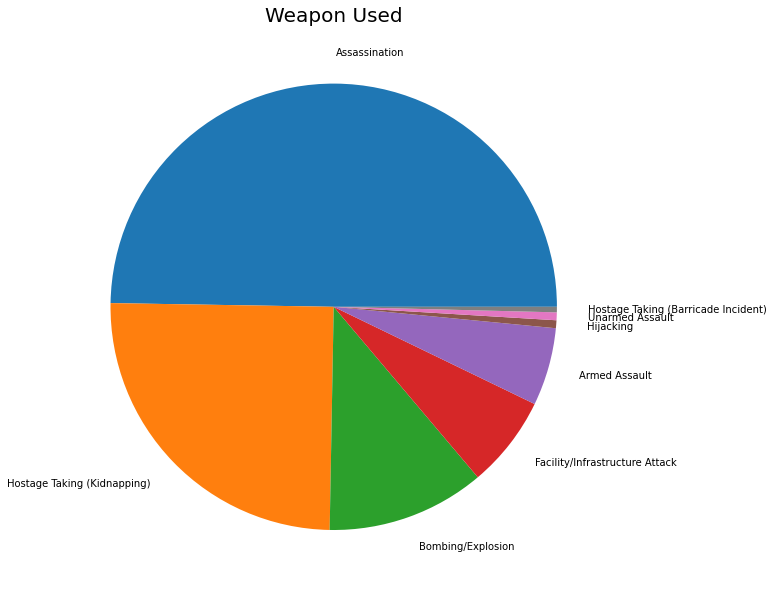

In [39]:
# Plot pie chart
plt.figure(figsize = (10,15))
dfa = terrorism[terrorism.Attack_Type != 'Unknown']
labels = dfa['Attack_Type'].unique()
plt.pie(terrorism['Attack_Type'].value_counts().drop('Unknown'), labels = labels, labeldistance=1.14)
plt.title('Weapon Used', fontsize = 20)
plt.show()

**Conclusion** - The maximum number of Terrorist attacks are from Bombing Explosion followed by Armed Assault then Assassination and so on.


**2. Explore Countries which suffer most from Terrorism.**

In [40]:
# Returns first ten counts of unique values in the column Country.
terrorism['Country'].value_counts()[:10]

Iraq              23441
Pakistan          13789
Afghanistan       12491
India             11558
Colombia           7490
Philippines        6762
Peru               5037
United Kingdom     4968
El Salvador        4190
Somalia            4121
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


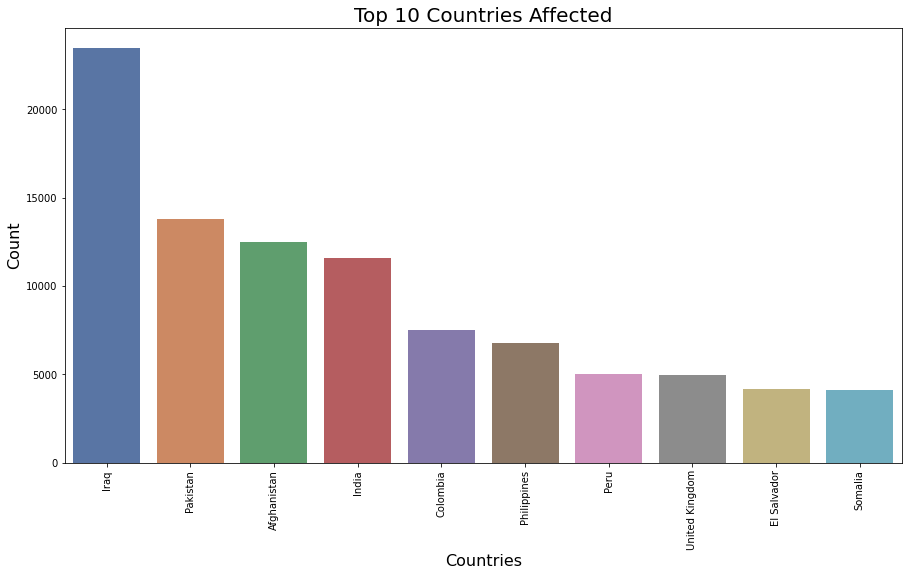

In [41]:
# Plot barchart
plt.figure(figsize = (15,8))
sns.barplot(terrorism['Country'].value_counts()[:10].index, terrorism['Country'].value_counts()[:10].values, palette = 'deep')
plt.title('Top 10 Countries Affected', fontsize = 20)
plt.xlabel('Countries', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - The most affected country by terrorism is Iraq followed by Pakistan, then Afghanistan and then India.


**3. The group which is Targeted the most by Terrorism.**

In [42]:
# Returns first ten counts of unique values in the column Targeted_group.
terrorism['Targeted_group'].value_counts()[:10]

Private Citizens & Property       41410
Military                          27396
Police                            23770
Government (General)              20465
Business                          18861
Transportation                     6097
Unknown                            5206
Religious Figures/Institutions     4284
Educational Institution            4174
Utilities                          4118
Name: Targeted_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


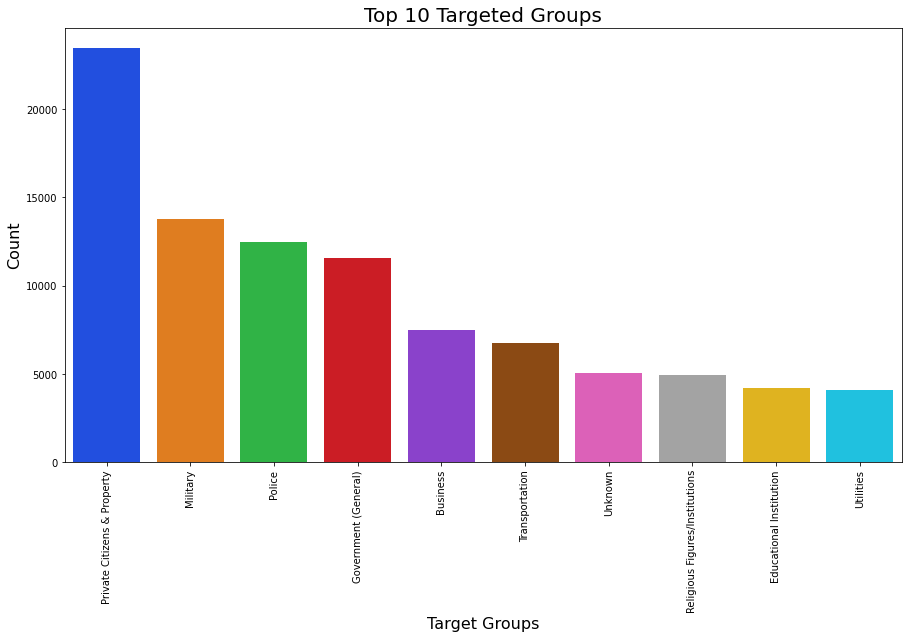

In [43]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(terrorism['Targeted_group'].value_counts()[:10].index, terrorism['Country'].value_counts()[:10].values, palette = 'bright')
plt.title('Top 10 Targeted Groups', fontsize = 20)
plt.xlabel('Target Groups', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - The most Targeted group is Private Citizens and Property.
Then the Military, Police and Government are targeted.


**4. States affected most by Terrorism**

In [44]:
# Returns first ten counts of unique values in the column State.
terrorism['State'].value_counts()[:10]

Baghdad               7625
Northern Ireland      4276
Unknown               3733
Balochistan           3670
Saladin               3145
Khyber Pakhtunkhwa    3060
Nineveh               3048
Diyala                2874
Al Anbar              2874
Sindh                 2719
Name: State, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


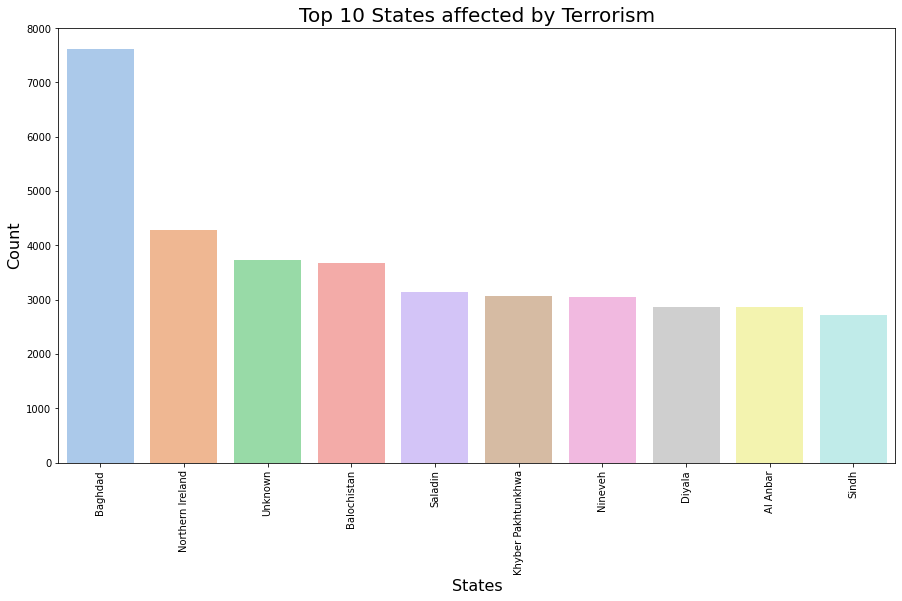

In [45]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(terrorism['State'].value_counts()[:10].index, terrorism['State'].value_counts()[:10].values, palette = 'pastel')
plt.title('Top 10 States affected by Terrorism', fontsize = 20)
plt.xlabel('States', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - Baghdad is the most affected by Terrorism.


**5. Weapon Type used most in Terrorist Activity.**

In [46]:
# Returns first ten percentage values of the Weapon Used.
(terrorism['Weapon_Used'].value_counts().head(10)/terrorism['Weapon_Used'].shape)*100

Explosives                                                                     50.190502
Firearms                                                                       33.312749
Unknown                                                                         8.434507
Incendiary                                                                      5.546687
Melee                                                                           2.057069
Chemical                                                                        0.187006
Sabotage Equipment                                                              0.079230
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.079230
Other                                                                           0.065248
Biological                                                                      0.020390
Name: Weapon_Used, dtype: float64

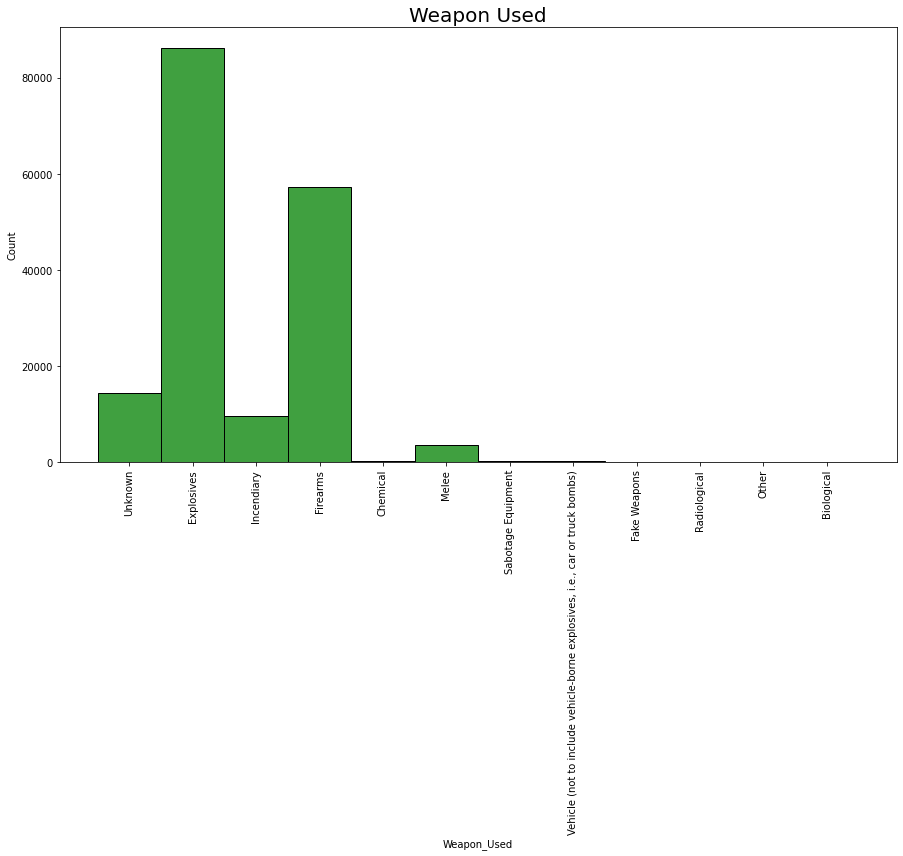

In [47]:
# Plot histogram
plt.figure(figsize = (15,8))
sns.histplot(terrorism['Weapon_Used'], color = 'green')
plt.title('Weapon Used', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - 50% of the Weapons used are Explosives and 33% of the Weapons used are Firearms by Terrorists.


**6. Terrorist Attack Year wise.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


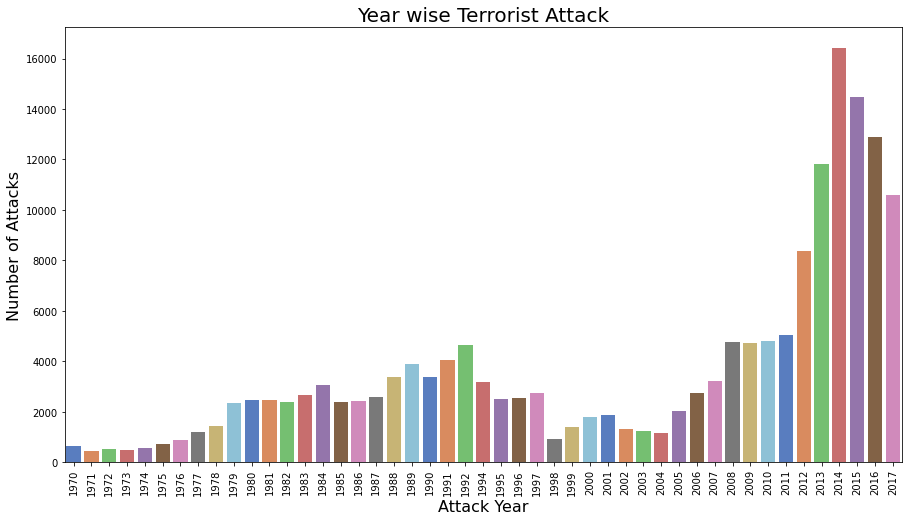

In [48]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(terrorism['Year'].value_counts().index, terrorism['Year'].value_counts().values, palette = 'muted')
plt.xlabel('Attack Year', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Year wise Terrorist Attack', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - There is a gradual increase in terrorist activities from 2012 onwards and 2014 has the highest number of terrorist attacks.


**7. Successful Terrorist Attack each year.**

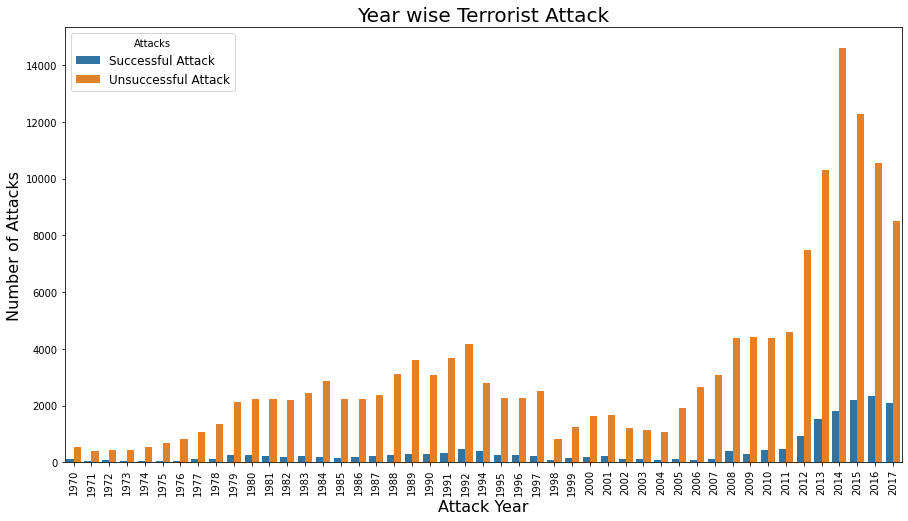

In [49]:
# Plots the count of Number of Attacks by Successful Attack and Unsuccessful Attack.
plt.figure(figsize = (15,8))
sns.countplot(x=terrorism['Year'], hue='Attack_Success', data=terrorism)
plt.xlabel('Attack Year', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Year wise Terrorist Attack', fontsize = 20)
plt.xticks(rotation = 90)
plt.legend(title='Attacks', loc='upper left', labels=['Successful Attack', 'Unsuccessful Attack'], fontsize=12)
plt.show()

**Conclusion** - In the year 2016, their were most number of successful attacks.


**8. Most active Terrorist Groups.**

In [50]:
# Returns first ten counts of unique values in the column Terrorist_group dropping the value 'Unknown'.
terrorism['Terrorist_group'].value_counts().drop('Unknown').head(10)

Taliban                                             7283
Islamic State of Iraq and the Levant (ISIL)         5180
Shining Path (SL)                                   3748
Al-Shabaab                                          3267
New People's Army (NPA)                             2691
Irish Republican Army (IRA)                         2438
Farabundo Marti National Liberation Front (FMLN)    2418
Boko Haram                                          2382
Revolutionary Armed Forces of Colombia (FARC)       2374
Kurdistan Workers' Party (PKK)                      2219
Name: Terrorist_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


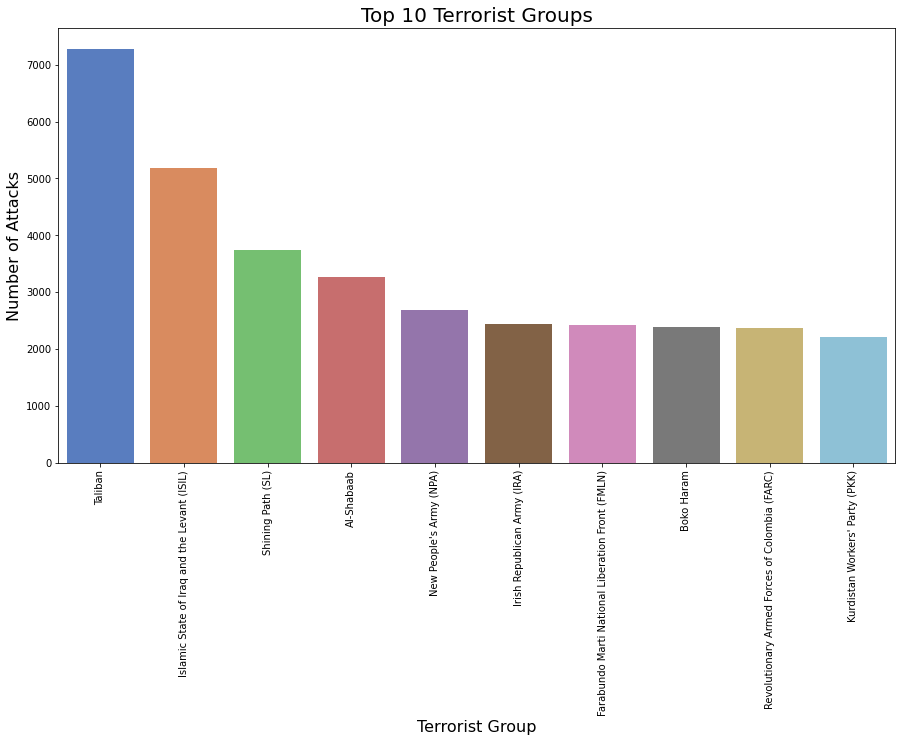

In [51]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(terrorism['Terrorist_group'].value_counts().drop('Unknown')[:10].index, terrorism['Terrorist_group'].value_counts().drop('Unknown')[:10].values, palette = 'muted')
plt.xlabel('Terrorist Group', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Top 10 Terrorist Groups', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - Here we clearly see, the most active group is Taliban followed by ISIL.


**9. Terrorist Activities by Region in each year.**

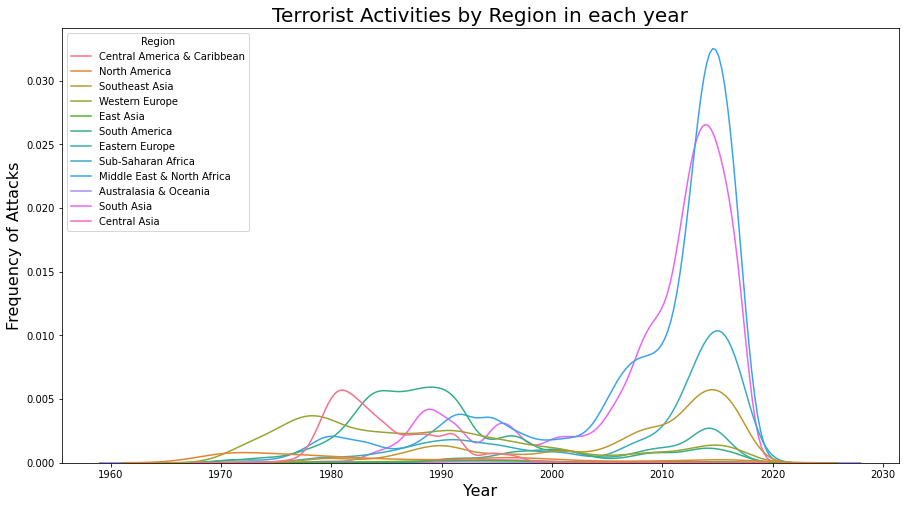

In [52]:
plt.figure(figsize=(15,8))
sns.kdeplot(terrorism['Year'], hue = terrorism['Region'])
plt.title('Terrorist Activities by Region in each year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Frequency of Attacks', fontsize = 16)
plt.show()

**Conclusion** - Middle East & North Africa has the highest peak followed by South Asia. Hence, the maximum frequency of Terrorist Attacks are in Middle East and North Africa.

# **CORRELATION ANALYSIS**

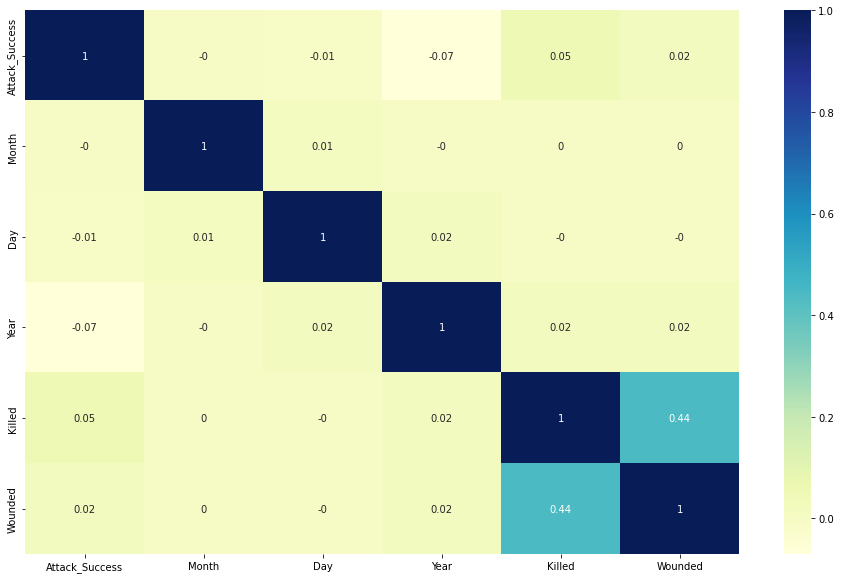

In [53]:
# Correlation plot
plt.figure(figsize = (16,10))
# Shows correlation of the parameters in dataset.
sns.heatmap(np.round(terrorism.corr(),2), annot = True, cmap = 'YlGnBu')

**Conclusion** - Their is as such no strong correlation between any attributes. Killed and Wounded are a bit correlated with correlation coefficient of 0.44.